In [1]:
import pandas as pd
data = pd.read_csv("sorted_combined_dataset.csv")

# Basic Info
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data.head()
}

data_info


{'Shape': (32337, 2),
 'Columns': ['Text', 'Language'],
 'Data Types': {'Text': dtype('O'), 'Language': dtype('O')},
 'Missing Values': {'Text': 0, 'Language': 0},
 'Sample Data':                                                 Text Language
 0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
 1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
 2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
 3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
 4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic}

In [7]:
Language_Column='Language'
unique_Languages=data[Language_Column].unique()
print("Unique_Languages in the dataset:")
print(unique_Languages)
data[Language_Column]=data[Language_Column].replace({'Sweedish':'Swedish'})
unique_languages = data[Language_Column].unique()
print("Updated unique languages in the dataset:")
print(unique_languages)

output_path = 'updated_Sorted_text.csv'
data.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")

Unique_Languages in the dataset:
['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Tamil' 'Thai' 'Turkish' 'Urdu']
Updated unique languages in the dataset:
['Arabic' 'Chinese' 'Danish' 'Dutch' 'English' 'Estonian' 'French'
 'German' 'Greek' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Kannada'
 'Korean' 'Latin' 'Malayalam' 'Persian' 'Portugeese' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Tamil' 'Thai' 'Turkish' 'Urdu']
Updated dataset saved to updated_Sorted_text.csv


Dataset Shape: (32337, 2)

Columns:
 Index(['Text', 'Language'], dtype='object')

Data Types:
 Text        object
Language    object
dtype: object

Missing Values:
 Text        0
Language    0
dtype: int64

Sample Data:
                                                 Text Language
0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic

Language Distribution:
Language
English       2385
French        2014
Spanish       1819
Russian       1692
Swedish       1676
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Persian       1000
Thai          1000
Romanian      1000
Pushto        1000
Portugese     1000
Korean        1000
Latin         1000
Chinese       1000
Japanese      1000
Indonesian   

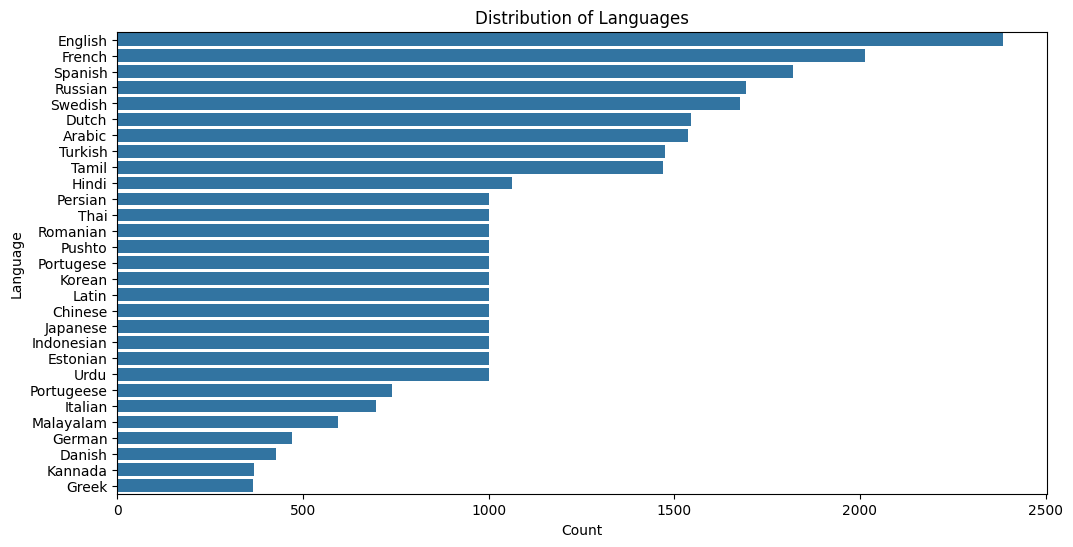


Text Length Statistics:
count    32337.000000
mean       281.788880
std        266.998761
min          1.000000
25%        141.000000
50%        211.000000
75%        355.000000
max      19284.000000
Name: text_length, dtype: float64


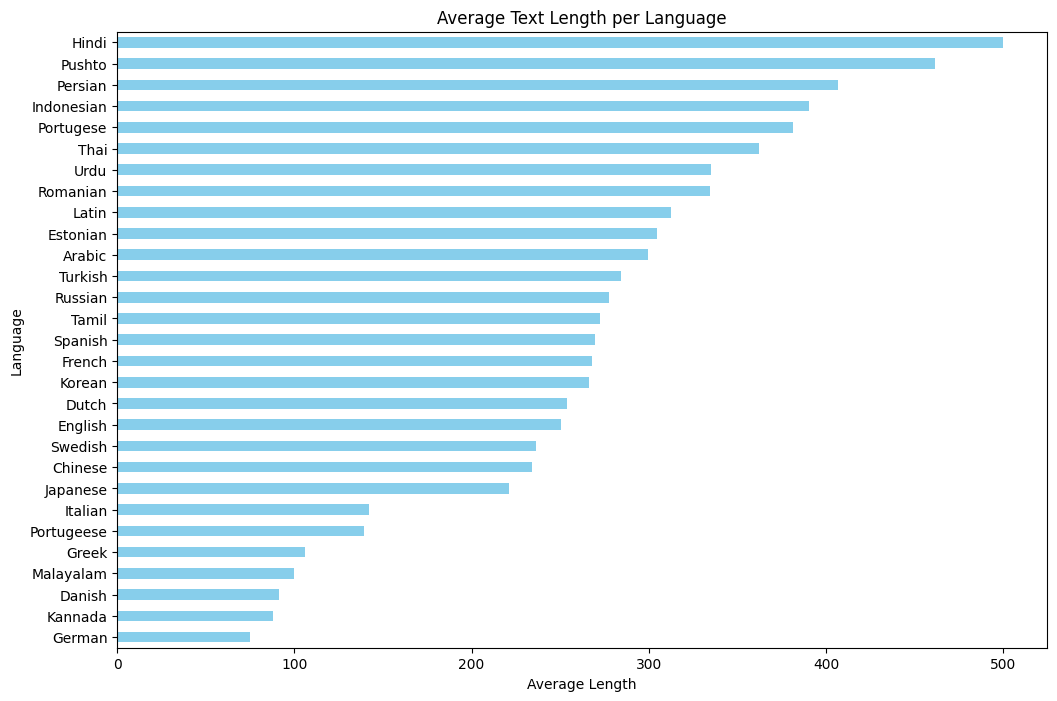

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\padme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Unique Words Statistics:
count    32337.000000
mean        26.259393
std         26.602668
min          0.000000
25%          5.000000
50%         20.000000
75%         37.000000
max        261.000000
Name: unique_words, dtype: float64


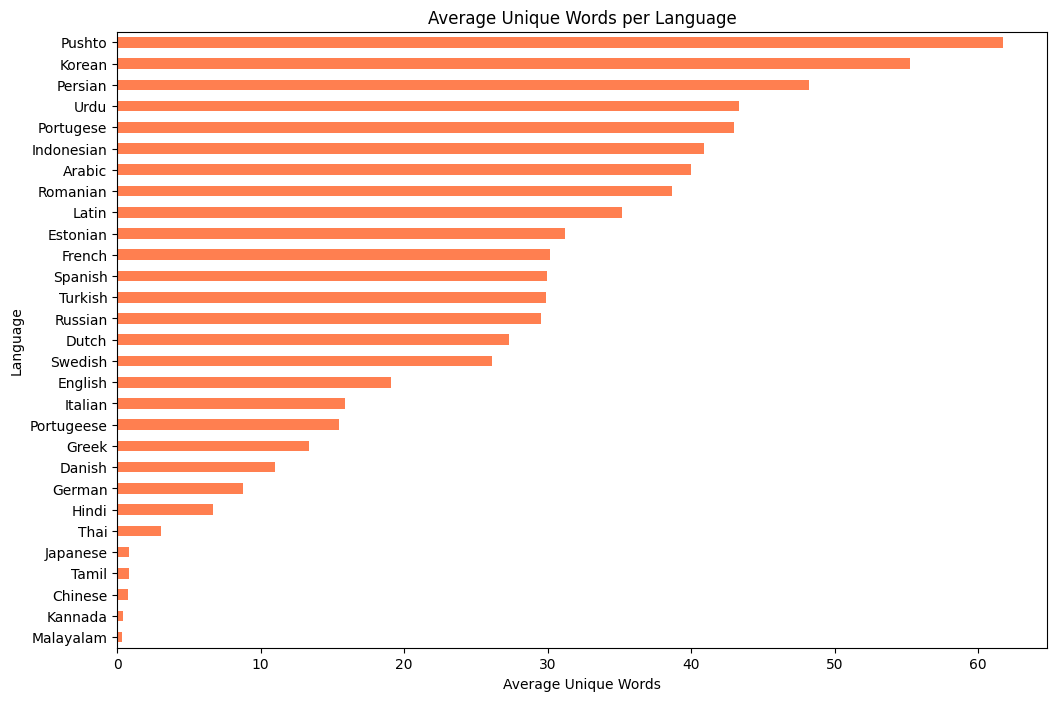

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("updated_Sorted_text.csv")

print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSample Data:\n", data.head())

# class distribution
if "Language" in data.columns:
    print("\nLanguage Distribution:")
    print(data["Language"].value_counts())
    
    # Plot language distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y="Language", order=data["Language"].value_counts().index)
    plt.title("Distribution of Languages")
    plt.xlabel("Count")
    plt.ylabel("Language")
    plt.show()

# Analyze text lengths
if "Text" in data.columns:
    data["text_length"] = data["Text"].str.len()
    print("\nText Length Statistics:")
    print(data["text_length"].describe())

    # Text length
    if "Language" in data.columns:
        avg_length_per_language = data.groupby("Language")["text_length"].mean().sort_values()
        avg_length_per_language.plot(kind="barh", figsize=(12, 8), color="skyblue")
        plt.title("Average Text Length per Language")
        plt.xlabel("Average Length")
        plt.ylabel("Language")
        plt.show()

from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def extract_unique_words(text):
    words = text.lower().split()
    return [word for word in words if word.isalpha() and word not in stop_words]

if "Text" in data.columns:
    data["unique_words"] = data["Text"].apply(lambda x: len(set(extract_unique_words(x))))
    print("\nUnique Words Statistics:")
    print(data["unique_words"].describe())
    
    # unique word per language
    if "Language" in data.columns:
        avg_unique_words = data.groupby("Language")["unique_words"].mean().sort_values()
        avg_unique_words.plot(kind="barh", figsize=(12, 8), color="coral")
        plt.title("Average Unique Words per Language")
        plt.xlabel("Average Unique Words")
        plt.ylabel("Language")
        plt.show()



In [12]:
import pandas as pd
import re

data = pd.read_csv("sorted_combined_dataset.csv")
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

def clean_text(text):
    text = re.sub(r'[!@#$%^&*(),.?":{}|<>~0-9\[\]]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['Cleaned_Text'] = data['Text'].apply(lambda x: clean_text(x).lower())

data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data[['Text', 'Cleaned_Text']].head()
}

print(data_info)

cleaned_text_file_path = "cleaned_text_DL.csv"
data[['Cleaned_Text', 'Language']].to_csv(cleaned_text_file_path, index=False, encoding='utf-8')

print(f"Cleaned text with language has been saved to '{cleaned_text_file_path}'")

{'Shape': (32125, 3), 'Columns': ['Text', 'Language', 'Cleaned_Text'], 'Missing Values': {'Text': 0, 'Language': 0, 'Cleaned_Text': 0}, 'Sample Data':                                                 Text  \
0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   
1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   
2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   
3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   
4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   

                                        Cleaned_Text  
0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...  
1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...  
2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...  
3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...  
4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...  }
Cleaned text with language has been saved to 'cleaned_text_DL.csv'


In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

file_path = 'cleaned_text_DL.csv'
df = pd.read_csv(file_path)

word_column = 'Cleaned_Text'

df = df[df[word_column].notna() & (df[word_column] != '')]

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df[word_column])

sequences = tokenizer.texts_to_sequences(df[word_column])


max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

# Print the first 5 padded sequences
print(padded_sequences[:5])

df['padded_sequences'] = list(padded_sequences)

# Save the updated dataset
output_path = 'processed_dataset.csv'
df.to_csv(output_path, index=False)

print(f"Processed dataset saved to {output_path}")


[[  4874   7839  66386 ...      0      0      0]
 [   655 108453 108454 ...      0      0      0]
 [ 25643  37229     21 ...      0      0      0]
 [  3327    301  66393 ...      0      0      0]
 [ 19355   9430    142 ...      0      0      0]]
Processed dataset saved to processed_dataset.csv


In [21]:
import pandas as pd
data = pd.read_csv("updated_dataset.csv")

# Basic Info
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data.head()
}

data_info


{'Shape': (32102, 2),
 'Columns': ['Cleaned_Text', 'Language'],
 'Data Types': {'Cleaned_Text': dtype('O'), 'Language': dtype('O')},
 'Missing Values': {'Cleaned_Text': 0, 'Language': 0},
 'Sample Data':                                         Cleaned_Text Language
 0  برنامج لازم نفهم حيث يقدم البرنامج الذي يقدمه ...   Arabic
 1  كانت ستعيش حياتها في ذلك اليوم جاء صديقان لزيا...   Arabic
 2  مجرد التفكير في تلك الأم المسكينة النرجسية كان...   Arabic
 3  لقد كان حلمًا مغرورًا جدًا يا أمي ، فأنت لا تع...   Arabic
 4  وأنت تعرف أن أفضل جزء منه كان عندما كنت أرتدي ...   Arabic}

In [22]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

file_path = 'updated_dataset.csv'
df = pd.read_csv(file_path)
word_column = 'Cleaned_Text'

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[word_column]).toarray()

# Save the fitted vectorizer to a file
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

file_path = 'updated_dataset.csv'
df = pd.read_csv(file_path)
word_column = 'Cleaned_Text'

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=10000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df[word_column]).toarray()

y = LabelEncoder().fit_transform(df['Language'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a deeper neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(set(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('language_detection_model.h5')
print("Model saved as 'language_detection_model.h5'")

Epoch 1/15
402/402 [==============================] - 4s 8ms/step - loss: 1.0019 - accuracy: 0.7832 - val_loss: 0.2617 - val_accuracy: 0.9369
Epoch 2/15
402/402 [==============================] - 3s 6ms/step - loss: 0.2837 - accuracy: 0.9291 - val_loss: 0.2109 - val_accuracy: 0.9472
Epoch 3/15
402/402 [==============================] - 3s 7ms/step - loss: 0.2049 - accuracy: 0.9456 - val_loss: 0.2034 - val_accuracy: 0.9488
Epoch 4/15
402/402 [==============================] - 2s 6ms/step - loss: 0.1748 - accuracy: 0.9525 - val_loss: 0.2130 - val_accuracy: 0.9489
Epoch 5/15
402/402 [==============================] - 2s 6ms/step - loss: 0.1509 - accuracy: 0.9574 - val_loss: 0.2039 - val_accuracy: 0.9492
Epoch 6/15
402/402 [==============================] - 2s 6ms/step - loss: 0.1441 - accuracy: 0.9589 - val_loss: 0.2232 - val_accuracy: 0.9485
Epoch 7/15
402/402 [==============================] - 3s 6ms/step - loss: 0.1329 - accuracy: 0.9604 - val_loss: 0.2357 - val_accuracy: 0.9472
Epoch 

C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


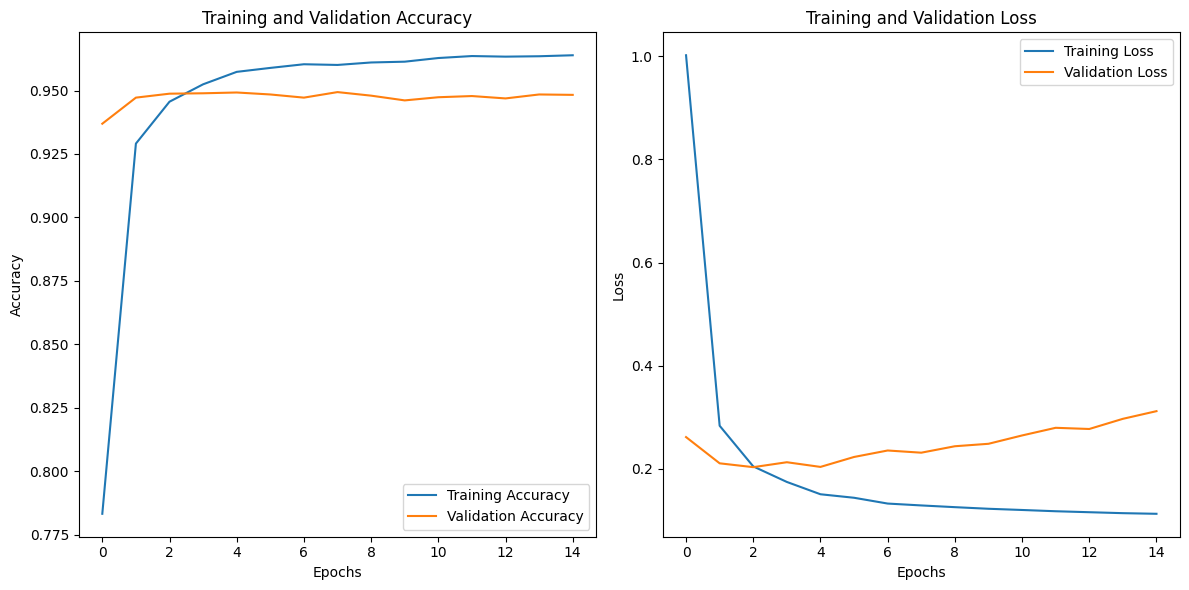

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def predict_language(custom_input, vectorizer, model):
    custom_input_vectorized = vectorizer.transform([custom_input]).toarray()

    predicted_class_probabilities = model.predict(custom_input_vectorized)

    predicted_class = np.argmax(predicted_class_probabilities, axis=1)

    label_encoder = LabelEncoder()
    label_encoder.fit(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'])  # Replace with the actual language labels you have

    predicted_language = label_encoder.inverse_transform(predicted_class)

    return predicted_language[0]

custom_input = "नमस्ते, आप कैसे हैं?"
model = load_model('language_detection_model.h5')

# Predict the language
predicted_language = predict_language(custom_input, vectorizer, model)
print(f"Predicted language: {predicted_language}")


1/1 [==============================] - 0s 48ms/step
Predicted language: Hindi


In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def predict_language(custom_input, vectorizer, model):
    custom_input_vectorized = vectorizer.transform([custom_input]).toarray()

    predicted_class_probabilities = model.predict(custom_input_vectorized)

    predicted_class = np.argmax(predicted_class_probabilities, axis=1)

    label_encoder = LabelEncoder()
    label_encoder.fit(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'])  # Replace with the actual language labels you have

    predicted_language = label_encoder.inverse_transform(predicted_class)

    return predicted_language[0]

custom_input = "こんにちは、お元気ですか？"
model = load_model('language_detection_model.h5')

# Predict the language
predicted_language = predict_language(custom_input, vectorizer, model)
print(f"Predicted language: {predicted_language}")


1/1 [==============================] - 0s 39ms/step
Predicted language: Japanese


In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def predict_language(custom_input, vectorizer, model):
    custom_input_vectorized = vectorizer.transform([custom_input]).toarray()

    predicted_class_probabilities = model.predict(custom_input_vectorized)

    predicted_class = np.argmax(predicted_class_probabilities, axis=1)

    label_encoder = LabelEncoder()
    label_encoder.fit(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'])  # Replace with the actual language labels you have

    predicted_language = label_encoder.inverse_transform(predicted_class)

    return predicted_language[0]

custom_input = "مرحبًا، كيف حالك؟"
model = load_model('language_detection_model.h5')

# Predict the language
predicted_language = predict_language(custom_input, vectorizer, model)
print(f"Predicted language: {predicted_language}")


1/1 [==============================] - 0s 38ms/step
Predicted language: Arabic


In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def predict_language(custom_input, vectorizer, model):
    custom_input_vectorized = vectorizer.transform([custom_input]).toarray()

    predicted_class_probabilities = model.predict(custom_input_vectorized)

    predicted_class = np.argmax(predicted_class_probabilities, axis=1)

    label_encoder = LabelEncoder()
    label_encoder.fit(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugeese', 'Portugese', 'Pushto', 'Romanian', 'Russian',
       'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish',
       'Urdu'])  # Replace with the actual language labels you have

    predicted_language = label_encoder.inverse_transform(predicted_class)

    return predicted_language[0]

custom_input = "வணக்கம், எப்படி இருக்கீங்க?"
model = load_model('language_detection_model.h5')

# Predict the language
predicted_language = predict_language(custom_input, vectorizer, model)
print(f"Predicted language: {predicted_language}")


1/1 [==============================] - 0s 43ms/step
Predicted language: Tamil


In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = "updated_dataset.csv"
df = pd.read_csv(file_path)
texts = df['Cleaned_Text'].astype(str).values
labels = df['Language'].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Limit to top 10,000 words
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

#Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# LSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('language_detection_model_lstm.h5')
print("Model saved as 'language_detection_model_lstm.h5'")

# Save the tokenizer and label encoder
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Example Custom Input
def predict_language(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    prediction = model.predict(padded_seq)
    predicted_label = label_encoder.inverse_transform([prediction.argmax()])
    return predicted_label[0]

custom_text = "مرحبا كيف حالك؟"  # Arabic
predicted_language = predict_language(custom_text)
print(f"The predicted language is: {predicted_language}")


Epoch 1/15
402/402 [==============================] - 35s 82ms/step - loss: 3.1159 - accuracy: 0.0912 - val_loss: 3.1065 - val_accuracy: 0.1073
Epoch 2/15
402/402 [==============================] - 33s 83ms/step - loss: 2.8759 - accuracy: 0.1220 - val_loss: 2.7720 - val_accuracy: 0.1442
Epoch 3/15
402/402 [==============================] - 34s 86ms/step - loss: 3.1342 - accuracy: 0.0879 - val_loss: 3.2800 - val_accuracy: 0.0749
Epoch 4/15
402/402 [==============================] - 33s 82ms/step - loss: 3.2247 - accuracy: 0.0743 - val_loss: 2.8571 - val_accuracy: 0.1104
Epoch 5/15
402/402 [==============================] - 33s 82ms/step - loss: 2.8860 - accuracy: 0.1244 - val_loss: 2.4648 - val_accuracy: 0.1864
Epoch 6/15
402/402 [==============================] - 33s 82ms/step - loss: 2.3561 - accuracy: 0.1903 - val_loss: 2.1926 - val_accuracy: 0.2028
Epoch 7/15
402/402 [==============================] - 34s 84ms/step - loss: 2.0939 - accuracy: 0.2287 - val_loss: 1.9643 - val_accuracy:

C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 486ms/step
The predicted language is: Arabic


In [12]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


file_path = "updated_dataset.csv" 
df = pd.read_csv(file_path)

texts = df['Cleaned_Text'].astype(str).values
labels = df['Language'].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

#Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Limit to top 10,000 words
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

#Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# GRU
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('language_detection_model_GRU.h5')
print("Model saved as 'language_detection_model_GRu.h5'")

# Save the tokenizer and label encoder
import pickle
with open('tokenizer_GRU.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder_GRU.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Example Custom Input
def predict_language(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    prediction = model.predict(padded_seq)
    predicted_label = label_encoder.inverse_transform([prediction.argmax()])
    return predicted_label[0]

custom_text = "مرحبا كيف حالك؟"  # Arabic example
predicted_language = predict_language(custom_text)
print(f"The predicted language is: {predicted_language}")


Epoch 1/10
402/402 [==============================] - 33s 76ms/step - loss: 3.0029 - accuracy: 0.1229 - val_loss: 1.8883 - val_accuracy: 0.4272
Epoch 2/10
402/402 [==============================] - 31s 76ms/step - loss: 0.8457 - accuracy: 0.7639 - val_loss: 0.3922 - val_accuracy: 0.8961
Epoch 3/10
402/402 [==============================] - 30s 76ms/step - loss: 0.3390 - accuracy: 0.9147 - val_loss: 0.3090 - val_accuracy: 0.9126
Epoch 4/10
402/402 [==============================] - 31s 77ms/step - loss: 0.2634 - accuracy: 0.9279 - val_loss: 0.2903 - val_accuracy: 0.9203
Epoch 5/10
402/402 [==============================] - 30s 75ms/step - loss: 0.2321 - accuracy: 0.9322 - val_loss: 0.2984 - val_accuracy: 0.9120
Epoch 6/10
402/402 [==============================] - 30s 76ms/step - loss: 0.2098 - accuracy: 0.9350 - val_loss: 0.2853 - val_accuracy: 0.9226
Epoch 7/10
402/402 [==============================] - 31s 77ms/step - loss: 0.1939 - accuracy: 0.9390 - val_loss: 0.2904 - val_accuracy:

C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 468ms/step
The predicted language is: Arabic


In [16]:
import tensorflow as tf
import pickle

# Load the saved models
gru_model = tf.keras.models.load_model('language_detection_model_GRU.h5')
lstm_model = tf.keras.models.load_model('language_detection_model_lstm.h5')

# Load the tokenizers and label encoders
with open('tokenizer_GRU.pkl', 'rb') as f:
    tokenizer_gru = pickle.load(f)
with open('tokenizer.pkl', 'rb') as f:
    tokenizer_dense = pickle.load(f)
    tokenizer_lstm = tokenizer_dense

with open('label_encoder_GRU.pkl', 'rb') as f:
    label_encoder_gru = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    label_encoder_dense_lstm = pickle.load(f)

# Define a function to predict the language using a specific model
def predict_language(model_name, text):
    if model_name == 'GRU':
        tokenizer = tokenizer_gru
        model = gru_model
        label_encoder = label_encoder_gru
    elif model_name == 'LSTM':
        tokenizer = tokenizer_lstm
        model = lstm_model
        label_encoder = label_encoder_dense_lstm
    else:
        return "Invalid model name"

    # Preprocess the input text
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post', truncating='post')

    # Make the prediction
    prediction = model.predict(padded_seq)
    predicted_label = label_encoder.inverse_transform([prediction.argmax()])
    return predicted_label[0]

# Example usage for custom input
custom_text = "मुझे नई भाषाएँ सीखना पसंद है।"  # Arabic example
model_choice = "LSTM"  # Change to test other models

predicted_language = predict_language(model_choice, custom_text)
print(f"The predicted language using {model_choice} model is: {predicted_language}")


1/1 [==============================] - 1s 912ms/step
The predicted language using LSTM model is: Hindi


In [18]:
import tensorflow as tf
import pickle

# Load the saved models
gru_model = tf.keras.models.load_model('language_detection_model_GRU.h5')
lstm_model = tf.keras.models.load_model('language_detection_model_lstm.h5')

# Load the tokenizers and label encoders
with open('tokenizer_GRU.pkl', 'rb') as f:
    tokenizer_gru = pickle.load(f)
with open('tokenizer.pkl', 'rb') as f:
    tokenizer_dense = pickle.load(f)
    tokenizer_lstm = tokenizer_dense

with open('label_encoder_GRU.pkl', 'rb') as f:
    label_encoder_gru = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    label_encoder_dense_lstm = pickle.load(f)

# Define a function to predict the language using a specific model
def predict_language(model_name, text):
    if model_name == 'GRU':
        tokenizer = tokenizer_gru
        model = gru_model
        label_encoder = label_encoder_gru
    elif model_name == 'LSTM':
        tokenizer = tokenizer_lstm
        model = lstm_model
        label_encoder = label_encoder_dense_lstm
    else:
        return "Invalid model name"

    # Preprocess the input text
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100, padding='post', truncating='post')

    # Make the prediction
    prediction = model.predict(padded_seq)
    predicted_label = label_encoder.inverse_transform([prediction.argmax()])
    return predicted_label[0]

# Example usage for custom input
custom_text = "Mi piace imparare nuove lingue."  # Arabic example
model_choice = "GRU"  # Change to test other models

predicted_language = predict_language(model_choice, custom_text)
print(f"The predicted language using {model_choice} model is: {predicted_language}")


1/1 [==============================] - 0s 448ms/step
The predicted language using GRU model is: Italian


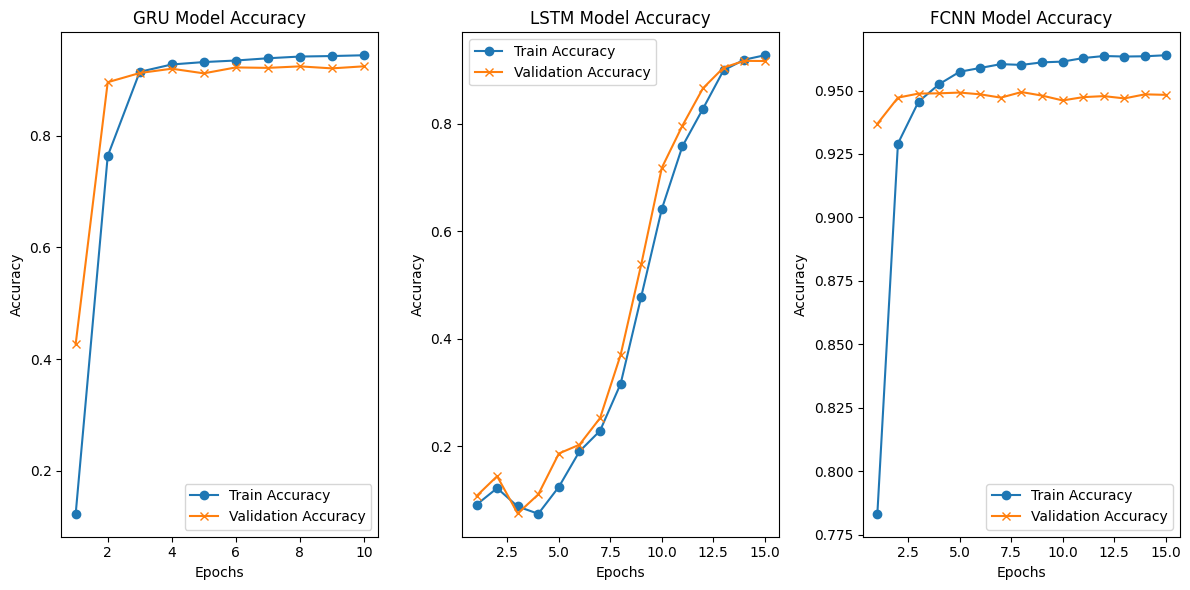

In [20]:
import matplotlib.pyplot as plt

# Data for the three models
epochs_gru = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
gru_train_accuracy = [0.1229, 0.7639, 0.9147, 0.9279, 0.9322, 0.9350, 0.9390, 0.9421, 0.9430, 0.9444]
gru_val_accuracy = [0.4272, 0.8961, 0.9126, 0.9203, 0.9120, 0.9226, 0.9218, 0.9245, 0.9209, 0.9246]

epochs_lstm = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
lstm_train_accuracy = [0.0912, 0.1220, 0.0879, 0.0743, 0.1244, 0.1903, 0.2287, 0.3161, 0.4780, 0.6410, 0.7576, 0.8275, 0.8990, 0.9186, 0.9269]
lstm_val_accuracy = [0.1073, 0.1442, 0.0749, 0.1104, 0.1864, 0.2028, 0.2523, 0.3699, 0.5379, 0.7176, 0.7960, 0.8656, 0.9039, 0.9165, 0.9162]

epochs_fcnn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
fcnn_train_accuracy = [0.7832, 0.9291, 0.9456, 0.9525, 0.9574, 0.9589, 0.9604, 0.9601, 0.9611, 0.9614, 0.9628, 0.9636, 0.9634, 0.9635, 0.9639]
fcnn_val_accuracy = [0.9369, 0.9472, 0.9488, 0.9489, 0.9492, 0.9485, 0.9472, 0.9494, 0.9480, 0.9461, 0.9474, 0.9478, 0.9469, 0.9485, 0.9483]

# Plotting
plt.figure(figsize=(12, 6))

# GRU Model
plt.subplot(1, 3, 1)
plt.plot(epochs_gru, gru_train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs_gru, gru_val_accuracy, label='Validation Accuracy', marker='x')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# LSTM Model
plt.subplot(1, 3, 2)
plt.plot(epochs_lstm, lstm_train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs_lstm, lstm_val_accuracy, label='Validation Accuracy', marker='x')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# FCNN Model (Fully Connected Neural Network)
plt.subplot(1, 3, 3)
plt.plot(epochs_fcnn, fcnn_train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs_fcnn, fcnn_val_accuracy, label='Validation Accuracy', marker='x')
plt.title('FCNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
